In [1]:
import librosa
import IPython.display
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
os.listdir('../../data/dafit/DF_903_split/train/bed')

['00176480_nohash_0.wav',
 '004ae714_nohash_0.wav',
 '004ae714_nohash_1.wav',
 '00f0204f_nohash_0.wav',
 '00f0204f_nohash_1.wav',
 '012c8314_nohash_0.wav',
 '012c8314_nohash_1.wav',
 '0132a06d_nohash_0.wav',
 '0135f3f2_nohash_0.wav',
 '0137b3f4_nohash_0.wav',
 '014f9f65_nohash_0.wav',
 '01648c51_nohash_0.wav',
 '01648c51_nohash_1.wav',
 '016e2c6d_nohash_0.wav',
 '01b4757a_nohash_0.wav',
 '01b4757a_nohash_1.wav',
 '01bcfc0c_nohash_0.wav',
 '0227998e_nohash_0.wav',
 '02746d24_nohash_0.wav',
 '035de8fe_nohash_0.wav',
 '0362539c_nohash_0.wav',
 '0362539c_nohash_1.wav',
 '037c445a_nohash_0.wav',
 '0397ecda_nohash_0.wav',
 '03c96658_nohash_0.wav',
 '042186b8_nohash_0.wav',
 '042ea76c_nohash_0.wav',
 '0447d7c1_nohash_0.wav',
 '0474c92a_nohash_0.wav',
 '0474c92a_nohash_1.wav',
 '05739450_nohash_0.wav',
 '05b2db80_nohash_0.wav',
 '05d18852_nohash_0.wav',
 '06076b6b_nohash_0.wav',
 '063d48cf_nohash_0.wav',
 '063d48cf_nohash_1.wav',
 '0685264e_nohash_0.wav',
 '07363607_nohash_0.wav',
 '079dfce3_n

In [4]:
audio_path = '../../data/dafit/DF_903_split/train/bed/00176480_nohash_0.wav'

## 구하고자 하는 값들
  
### 1. Sampling Rate (=sampling frequency)  
: 이산적인 신호를 만들기 위해 연속적 신호에서 얻어진 단위시간(주로 초)당 샘플링 횟수 정의한다. 단위는 헤르츠  
: 낮은 샘플링 레이트르 사용하면 데이터 크기가 낮아지고 저장과 전송이 용이하다는 장점이 있다.  
: 나이키스트-섀넌 정리에 따르면, 약 50kHz에서 60kHz 사이 이상의 샘플링 레이트는 인간이 들을 수 없다.  
: 192kHz 같은 높은 샘플링 레이트는 상호 변조 왜곡으로 인한 초음파 아티팩트, 너무 빠른 속도로 인한 부정확한 샘플링을 일으키기 쉽다.  
(출처) : https://ko.wikipedia.org/wiki/%EC%83%98%ED%94%8C%EB%A7%81_%EB%A0%88%EC%9D%B4%ED%8A%B8    
: librosa를 이용해 데이터를 load하면 sr은 default로 22050Kz로 설정된다. 
### 2. Bit Depth  
: bit depth가 올라갈 수록 디지털 데이터는 정밀하게 표현된다.  
: 소리에서는 bit depth가 높아질수록 음의 높낮이를 정밀하게 나누기 때문에 비교적 정확한 음 입력 가능  
: 하나의 음을 표현하는데 사용할 수 있는 bit 수가 많아지기 때문에 음량 표현을 더 정밀하게 할 수 있다.  
(출처) : https://m.blog.naver.com/PostView.nhn?blogId=team_csr&logNo=221026964278&proxyReferer=https%3A%2F%2Fwww.google.com%2F  
:librosa를 이용해 데이터를 load하면 default로 16으로 설정된다.  
(출처) : https://librosa.github.io/librosa/generated/librosa.core.load.html  
  
### 3. file length
: 음성 데이터의 지속 시간이며, librosa에서 get_duration으로 확인할 수 있다.  
: len(음성데이터)/sr

In [5]:
sr = librosa.get_samplerate(audio_path)
y, sr = librosa.load(audio_path, sr = sr)
dur = librosa.get_duration(y, sr)

In [52]:
dur = librosa.get_duration(y, sr)
dur

1.0

In [6]:
IPython.display.Audio(data = y, rate = sr)

In [8]:
y

array([ 9.1552734e-05,  3.0517578e-05,  1.8310547e-04, ...,
       -3.0517578e-05, -9.1552734e-05,  1.2207031e-04], dtype=float32)

In [9]:
y.shape

(16000,)

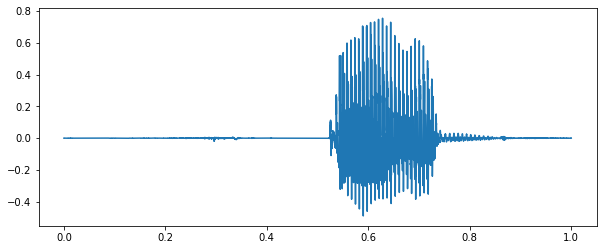

In [7]:
plt.figure(figsize=(10,4))
time = np.linspace(0, dur, len(y))
plt.plot(time, y);

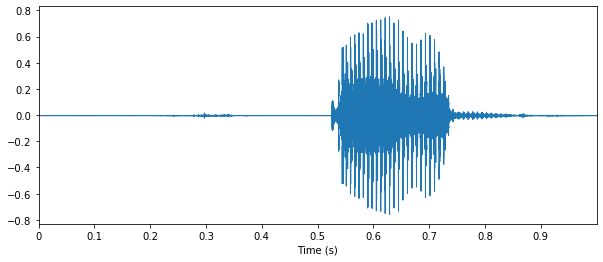

In [28]:
# librosa.display.waveplot을 이용해도 비슷한 결과를 볼 수 있다.
plt.figure(figsize=(10,4))
librosa.display.waveplot(y, sr=sr, x_axis='s');

In [30]:
librosa.display.cmap(y);

### MFCC(Mel-Frequency Cepstral Coefficient)
1. 오디오 신호를 프레임별(보통 20ms-40ms)로 나누어 FFT를 적용해 Spectrum을 구한다.    
    시간에 따른 음압의 표현(audio) --(FFT)--> 주파수에 따른 음압의 표현(spectrum)  
    Spectrum에서는 신호에서 **어떤 주파수가 강하고 약한지** 알 수 있다!  
    즉, 소리의 **고유한 특징 추출이 가능**  
2. Spectrum에 Mel Filter Bank를 적용해 Mel Spectrum을 구한다.  
3. Mel Spectrum에 Cepstral 분석을 적용해 MFCC를 구한다.  
    소리의 **고유한 특징 추출**에 사용하는 방법  
  
(출처) : https://brightwon.tistory.com/11

In [61]:
librosa.feature.melspectrogram(y, sr)

array([[1.7206279e-05, 1.7751872e-05, 9.1954971e-06, ..., 5.4637605e-04,
        4.8977369e-04, 6.4671668e-04],
       [3.4070042e-06, 9.7953534e-06, 2.3984456e-05, ..., 5.9670577e-04,
        2.7743544e-04, 1.7425480e-04],
       [7.5711273e-06, 1.2287322e-05, 1.5138876e-05, ..., 3.7354365e-04,
        2.3581146e-04, 1.8239963e-04],
       ...,
       [5.3894125e-09, 5.9183169e-09, 6.9898576e-09, ..., 1.0733238e-08,
        7.8816775e-09, 9.1691268e-09],
       [1.2664407e-08, 9.0261585e-09, 6.7234258e-09, ..., 8.5886640e-09,
        8.8190735e-09, 1.4444307e-08],
       [1.0890883e-08, 8.8313881e-09, 1.1139533e-08, ..., 8.2777722e-09,
        8.2820311e-09, 1.3635312e-08]], dtype=float32)

In [67]:
# 위와 같은 결과
D = np.abs(librosa.stft(y))**2 # stft == Short-time Fourier Transform
librosa.feature.melspectrogram(S=D, sr=sr)

array([[1.7206279e-05, 1.7751872e-05, 9.1954971e-06, ..., 5.4637605e-04,
        4.8977369e-04, 6.4671668e-04],
       [3.4070042e-06, 9.7953534e-06, 2.3984456e-05, ..., 5.9670577e-04,
        2.7743544e-04, 1.7425480e-04],
       [7.5711273e-06, 1.2287322e-05, 1.5138876e-05, ..., 3.7354365e-04,
        2.3581146e-04, 1.8239963e-04],
       ...,
       [5.3894125e-09, 5.9183169e-09, 6.9898576e-09, ..., 1.0733238e-08,
        7.8816775e-09, 9.1691268e-09],
       [1.2664407e-08, 9.0261585e-09, 6.7234258e-09, ..., 8.5886640e-09,
        8.8190735e-09, 1.4444307e-08],
       [1.0890883e-08, 8.8313881e-09, 1.1139533e-08, ..., 8.2777722e-09,
        8.2820311e-09, 1.3635312e-08]], dtype=float32)

In [79]:
D

array([[2.5319910e-04, 1.3604440e-04, 8.5605840e-05, ..., 2.9456511e-05,
        1.0647664e-02, 6.1150766e-03],
       [5.7376015e-05, 9.6982345e-05, 4.3626483e-06, ..., 8.8283615e-03,
        7.8226114e-03, 1.1030748e-03],
       [8.9855981e-05, 8.0522361e-05, 2.7470855e-05, ..., 4.2573963e-03,
        2.3620299e-03, 1.1625698e-02],
       ...,
       [7.6145561e-09, 3.5718287e-08, 3.2713146e-08, ..., 1.8375592e-07,
        7.4571361e-08, 1.0283867e-07],
       [2.1115296e-09, 1.8549430e-08, 7.4369217e-09, ..., 7.0687406e-08,
        1.0478271e-08, 1.4054121e-08],
       [2.7331357e-08, 3.6474898e-08, 2.4742070e-08, ..., 2.4440817e-08,
        5.0084075e-09, 8.5135605e-09]], dtype=float32)

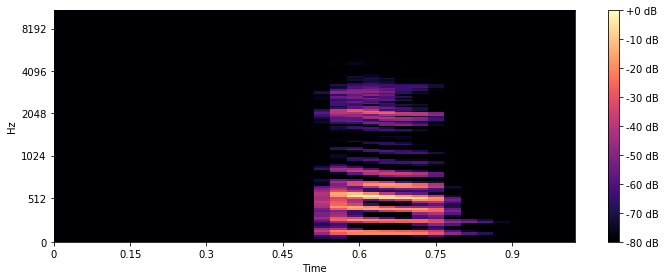

In [73]:
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
log_S = librosa.amplitude_to_db(S, ref=np.max) # == librosa.power_to_db(S**2, ref=np.max)
plt.figure(figsize=(10,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout();

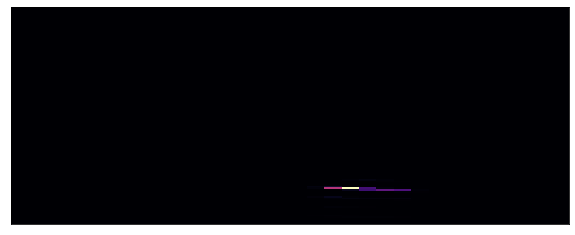

In [80]:
plt.figure(figsize=(10,4))
librosa.display.specshow(S**2, sr=sr);

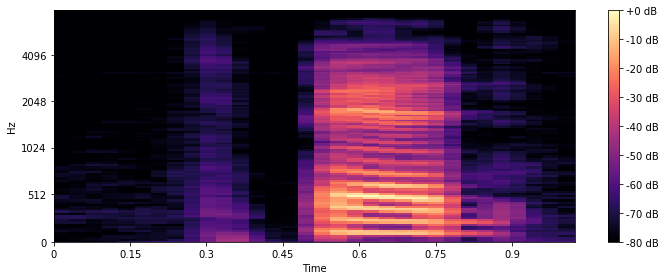

In [76]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, 
                         x_axis='time', y_axis='mel',
                         sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.tight_layout();